<a href="https://colab.research.google.com/github/aishwaryage/p4p/blob/main/day5/Project4_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fitting and the Breit-Wigner Distributions**

In [34]:
# Import needed python libraries

import matplotlib.pyplot as plt
import numpy as np
import scipy
plt.rc('text', usetex=False) # set to false because Colab doesn't like latex :(
plt.rc('font', family='serif')

**Exercise 1: Breit-Wigner Distribution**

Here we consider particle distributions described by
a simplified version of a Breit-Wigner distribution
https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

In [35]:
# Let's define some basic functions

# define pi from the numpy library
pi= np.pi

# Create a function that accepts a variable x and calculates the square root
def sqrt(x):
	# -- your code here ---
	return (x**0.5)

# Create a function that accepts a variable x and calculates the exponential
def exp(x):
	# -- your code here ---
	return np.exp(x)

# Create a funtion to calculate the Breit-Wigner paramaters
def P_BW(M,Gamma,E):
	# -- your code here --- hint look at the slides
	tmp1 = (E**2 - M**2)**2
	tmp2 = M**2*Gamma**2
	tmp3 = M**3*Gamma
	return tmp3 / ( tmp1 + tmp2 )

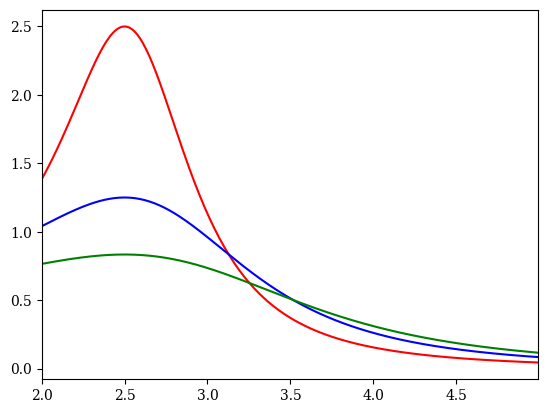

In [36]:
# Now lets Breit-Wigner distribution using some different values of Gamma
# Suggestion, try to recreate the plot from the slides
Es = np.arange(2,5,.01)
M = 2.5

# Example for 1 Gamma value
Gamma = 1
plt.plot(Es, P_BW(M,Gamma,Es),color='r')

# Plot some more gamma values
# -- your code here ---
# Example for 2 Gamma value
Gamma = 2
plt.plot(Es, P_BW(M,Gamma,Es),color='b')
# Example for 3 Gamma value
Gamma = 3
plt.plot(Es, P_BW(M,Gamma,Es),color='g')
# Set the plot limits
plt.xlim([min(Es), max(Es)])

# How does the distribution behave as a function of the
# width at its peak. Does it grow or decrease with the Γ?
# The width increases with increase in Gamma, meaning that it's lifetime
# resonance is more when gamma is less(evident from it's definition in the slide) and hence a narrower width would
# imply better resonance of the energy with the given mass

# Save the plot to your google drive folder
plt.savefig(f'BW_example.pdf',
				bbox_inches='tight',
				transparent=True)

**Exercise 2: Intro To Fitting & "Goodness Of Fit"**

Fitting is the process by which we determine the value of the parameters, that best “fit” the data. Generate a "good fit" we need to define a measure that tells us how good the fit is for a given value. In other words, we want to minimize the distance from our expected value (Pi) and the measured value of our distribution (Yi).

scipy has many different routines for fitting, optimization, and root finding: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [37]:
# Lets define some more function

# Chi Squared functions
def chi2_BW(M_Gamma):
	M,Gamma = M_Gamma
	Pis = P_BW(M,Gamma,Xs)

	chi20 = np.sum(pow((Pis-Ys)/sigs,2))
	dof = len(sigs)-2.0
	return chi20

def find_min_chi2_BW():
	M_Gamma_guess = [2.,1.0]
	from scipy import optimize
	M_Gamma = optimize.minimize(chi2_BW, M_Gamma_guess, method='nelder-mead')
	#print("M_Gamma",M_Gamma)
	return M_Gamma.x

chi2_BW(M,Gamma) 2654.3886462049177
chi2_BW(M,Gamma) 1798.4300903327783
chi2_BW(M,Gamma) 0.0
minimum chi^2(0) achieved at [M, Gamma]=  [2.99995863 0.49998755]


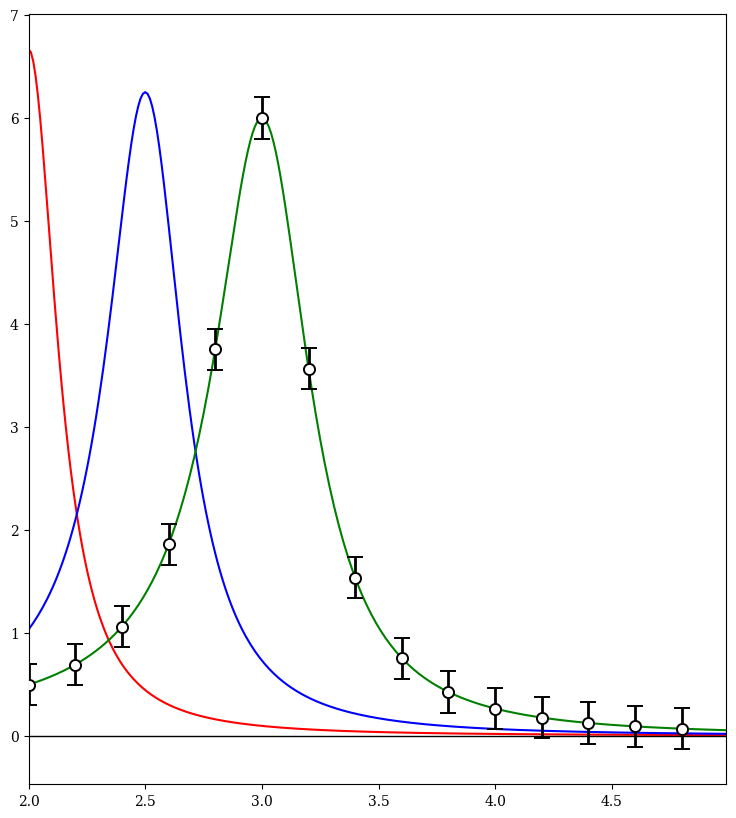

In [38]:
# Create a figure
plt.figure(figsize=(9,10))

# Define constants
sig = .2
M = 3.0
Gamma = .5

# Define Xs, Ys, and sigs
Xs  = np.arange(2,5,.2)
Ys = P_BW(M,Gamma,Xs)# -- your code here ---  Hist use the P_BW function

# Make a list the same size as Xs but where each entry = sig
sigs = np.full_like(Xs, sig)# -- your code here ---

# Plot the data and the error bars
plt.errorbar(Xs, Ys, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)

# Now guess some fit parameters
Es = np.arange(2,5,.01)
M = 2.0
Gamma = .3

print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='r')

# Guess some more fit parameters
M = 2.5# -- your code here ---
Gamma = 0.4# -- your code here ---
print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='b')

M = 3 # -- your code here ---
Gamma = 0.5 # -- your code here ---
print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='g')

# Q: How good is your Chi^2?

print("minimum chi^2(0) achieved at [M, Gamma]= ", find_min_chi2_BW())
plt.xlim([min(Es), max(Es)])
plt.axhline(y=0,color='k',linewidth=1)
plt.savefig('BW_example_2.pdf',
					bbox_inches='tight',
					transparent=True)


Exercise 2 : Fitting the data to a constant. Here taking the average as the constant.

shape(Xs) = (100,)
shape(Ys) = (100,)
shape(sigs) = (100,)
constant        message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 54.5820216391969
             x: [ 9.993e+02  4.071e+02 ...  1.132e+03  7.154e+02]
           nit: 18571
          nfev: 20000
 final_simplex: (array([[ 9.993e+02,  4.071e+02, ...,  1.132e+03,
                         7.154e+02],
                       [ 9.855e+02,  3.801e+02, ...,  1.108e+03,
                         6.750e+02],
                       ...,
                       [ 9.706e+02,  4.465e+02, ...,  1.165e+03,
                         6.908e+02],
                       [ 9.803e+02,  4.479e+02, ...,  1.224e+03,
                         6.792e+02]]), array([ 5.458e+01,  5.462e+01, ...,  5.521e+01,  5.522e+01]))


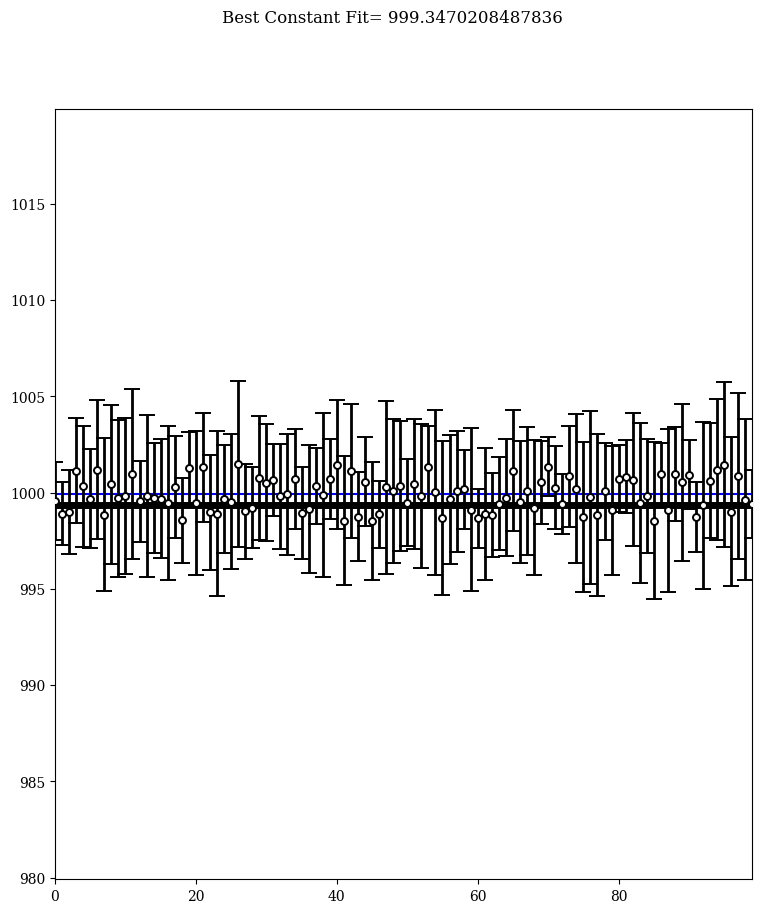

In [39]:
# Define Xs, Ys, and sigs
const_data = np.loadtxt("const_data.txt")
Xs, Ys, sigs = const_data.T
print("shape(Xs) =", np.shape(Xs))
print("shape(Ys) =", np.shape(Ys))
c = np.average(Ys)
const = np.full_like(Ys, c)
print("shape(sigs) =", np.shape(sigs))



def chi2_const(Ys, sigs, avg):
        chi20 = np.sum(pow((Ys-avg)/sigs,2))
        dof = len(sigs)-2.0
        return chi20

def chi2_const_min():
        from scipy import optimize
        constant_guess = const
        constant = optimize.minimize(chi2_const, constant_guess, args=(Ys, sigs), method='nelder-mead')
        print("constant",constant)
        return constant.x[0]

value = chi2_const_min()

# Create a figure
plt.figure(figsize=(9,10))



# Plot the data and the error bars
plt.errorbar(Xs, Ys, yerr= sigs, markersize=5,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)


plt.axhline(value, color='k', linewidth=5.);
plt.plot(Xs, const, color='b')


# Q: How good is your Chi^2?

# Set your limits and save your figure
plt.xlim([min(Xs), max(Xs)])
plt.ylim(c-20, c+20)
plt.axhline(y=0,color='k',linewidth=1)
plt.suptitle('Best Constant Fit= {}'.format(value))
plt.savefig('constant_example.pdf',
                                        bbox_inches='tight',
                                        transparent=True)

**Exercise 3: Fitting Without Guessing**

The goodness of fit, χ2, is a function of the parameters we wishing to determine. The optimal choice of parameters coincide with the minimum of the χ2. The hardest task is then to find the parameters that minimize it. One can try guessing, or generating random numbers, but in general we need something more systematic.Here, we are trying to fit the data to a straight line.

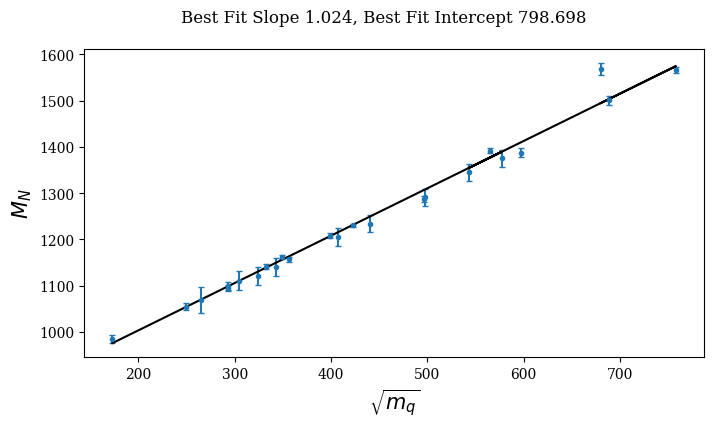

In [40]:

const_data = np.loadtxt('MN_data.txt')

Xs, Ys, sigs = const_data.T
# Sourcing code from Exercise 3 to find new ways to plot
fig, axs = plt.subplots(1, 1, figsize=(8, 4))
axs_errorbar = axs.errorbar(Xs, Ys, yerr= sigs, capsize=2., marker = '.', linestyle='None')
axs.set_ylabel('$M_N$', fontsize=15)
axs.set_xlabel('$\\sqrt{m_q}$', fontsize=15)

def chi2_line(slope_intercept):
  slope, intercept = slope_intercept
  line = slope*Xs + intercept
  chi20 = np.sum(pow((Ys-line)/sigs,2))
  dof = len(sigs)-2.0
  return chi20

slope_intercept_guess = [1., 1000.]

optimal_line = scipy.optimize.minimize(chi2_line, slope_intercept_guess, method='nelder-mead')
optimal_slope, optimal_intercept = optimal_line.x
axs.plot(Xs, optimal_slope*Xs+optimal_intercept, color ='k')
fig.suptitle('Best Fit Slope {:0.3f}, Best Fit Intercept {:0.3f}'.format(optimal_slope, optimal_intercept))
plt.savefig(f'straight_line.pdf',
				bbox_inches='tight',
				transparent=True)

**Exercise 4: Python Routines for Minimization**

Load the data in Dropbox:/P4P_2024/project#4/fitting_data/BW_data.txt

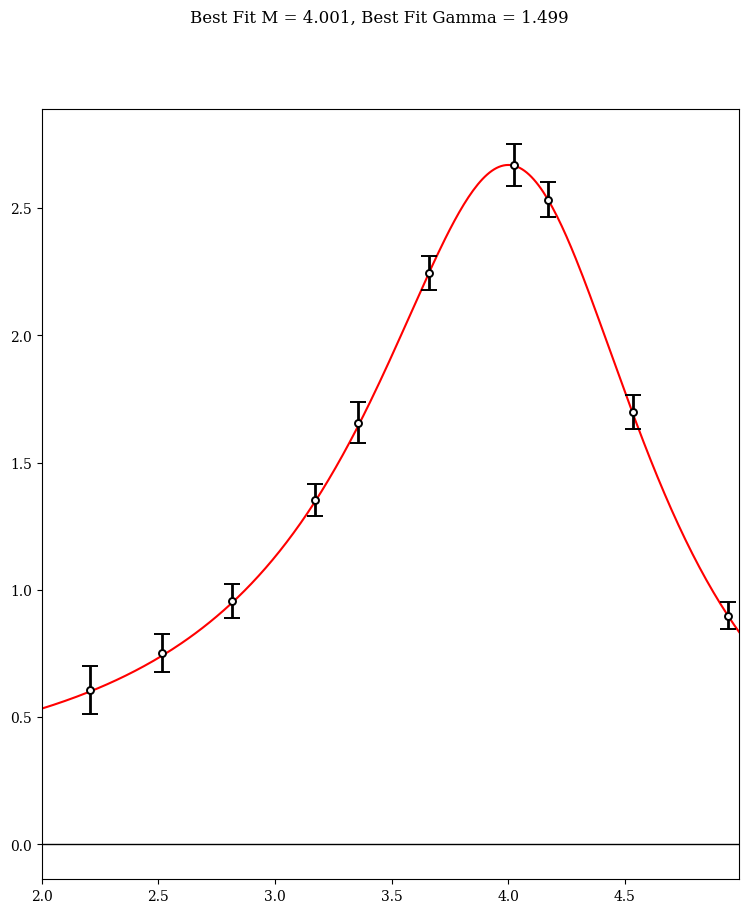

In [41]:
plt.figure(figsize=(9,10))

M = 3.0
Gamma = .5
sig = .2
bw_data = np.loadtxt("BW_data.txt")
# Define your Xs, Ys, and sigs
Xs, Ys, sigs = bw_data.T

# Chi Squared functions
def chi2_BW(M_Gamma):
	M,Gamma = M_Gamma
	Pis = P_BW(M,Gamma,Xs)

	chi20 = np.sum(pow((Pis-Ys)/sigs,2))
	dof = len(sigs)-2.0
	return chi20

def find_min_chi2_BW():
	M_Gamma_guess = [4.,0.5]
	from scipy import optimize
	M_Gamma = optimize.minimize(chi2_BW, M_Gamma_guess, method='nelder-mead')
	#print("M_Gamma",M_Gamma)
	return M_Gamma.x

optimised_m, optimised_gamma = find_min_chi2_BW()

# Plot data with error bars
# -- your code here ---
plt.errorbar(Xs, Ys, yerr= sigs, markersize=5,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)

#M,Gamma = # -- your code here ---  Hint use you want the min chi^2, look at the fucntions you have
Es = np.arange(2,5,.01)
plt.plot(Es, P_BW(optimised_m, optimised_gamma,Es),color='r')


plt.xlim([min(Es), max(Es)])
plt.axhline(y=0,color='k',linewidth=1)
plt.suptitle('Best Fit M = {:0.3f}, Best Fit Gamma = {:0.3f}'.format(optimised_m, optimised_gamma))
plt.savefig('BW_example_4.pdf',
					bbox_inches='tight',
					transparent=True)